**Trading Strategies for Vodafone**

**ADELINE MAKOKHA**

**ADM NO: 191199**



**Abstract**

This project aims to analyze the stock price of Vodafone using time series-based trading strategies. The goal is to apply and compare different trading strategies to determine their effectiveness in generating profitable trades. The strategies used to implement and evaluate the performance of MACD (Moving Average Convergence Divergence) model, Bollinger Bands and Relative Strength Index (RSI), and ARMA model.

**Introduction**

**2. Data Collection**

In [1]:

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from numpy import cumsum
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set seaborn style for better visualizations
sns.set(style="whitegrid")

In [2]:
# Download historical data for Vodacom Group Limited (VDMCY)

data = yf.download("VOD", start="2010-01-01", end="2024-12-31", auto_adjust=False)

# Display the first few rows of the data
data.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VOD,VOD,VOD,VOD,VOD,VOD
Date,,,,,,
2010-01-04,9.061067,23.639145,23.761469,23.537207,23.649338,4506322
2010-01-05,8.994641,23.465851,23.486238,23.231398,23.312946,3682085
2010-01-06,8.924310,23.282366,23.506626,23.241590,23.414883,4649548
2010-01-07,8.756296,22.844036,22.844036,22.568808,22.701324,7192398
2010-01-08,8.623447,22.497452,22.589195,22.303772,22.579000,10832398


In [3]:
# Drop the first level (stock names) from the MultiIndex
data.columns = data.columns.droplevel(1)



In [4]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,9.061067,23.639145,23.761469,23.537207,23.649338,4506322
2010-01-05,8.994641,23.465851,23.486238,23.231398,23.312946,3682085
2010-01-06,8.924310,23.282366,23.506626,23.241590,23.414883,4649548
2010-01-07,8.756296,22.844036,22.844036,22.568808,22.701324,7192398
2010-01-08,8.623447,22.497452,22.589195,22.303772,22.579000,10832398


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3773 entries, 2010-01-04 to 2024-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3773 non-null   float64
 1   Close      3773 non-null   float64
 2   High       3773 non-null   float64
 3   Low        3773 non-null   float64
 4   Open       3773 non-null   float64
 5   Volume     3773 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.3 KB


In [6]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,13.216622,23.344054,23.490875,23.185432,23.341012,6.037685e+06
std,3.323668,8.579125,8.615358,8.531118,8.573113,3.949394e+06
min,7.298866,8.060000,8.130000,8.020000,8.070000,1.031800e+06
25%,10.845462,16.200001,16.330000,16.080000,16.219999,3.473700e+06
50%,12.687225,25.321100,25.490000,25.209999,25.340000,5.138800e+06
75%,16.605932,29.734964,29.877676,29.520897,29.730000,7.515833e+06
max,20.366879,41.570000,42.139999,41.380001,41.740002,6.444836e+07


In [7]:
data.columns


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [8]:
data.shape


(3773, 6)

In [9]:
data.isnull().sum()

,0
Price,
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


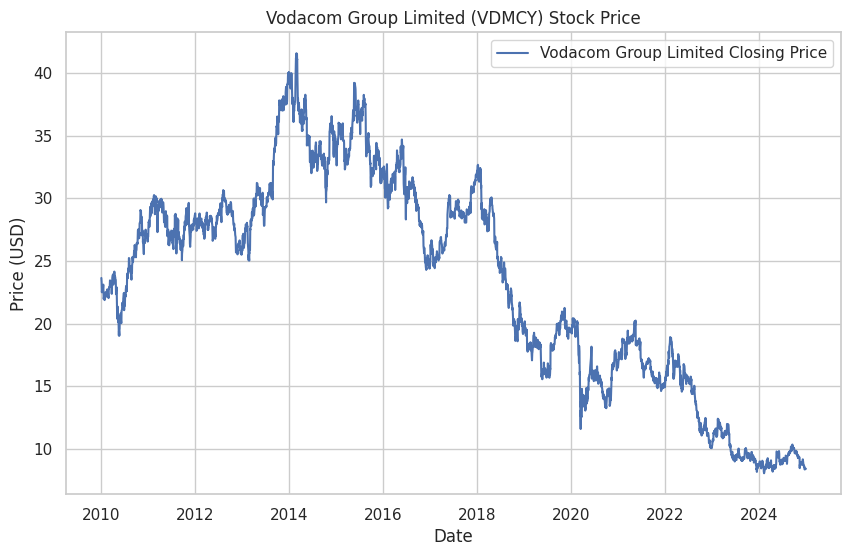

In [10]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Vodacom Group Limited Closing Price')
plt.title('Vodacom Group Limited (VDMCY) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

3. MACD Strategy
3.1. Description of MACD
The MACD (Moving Average Convergence Divergence) is a momentum-based trading indicator. It consists of three components:

MACD Line: The difference between the 12-day and 26-day exponential moving averages (EMAs).

Signal Line: The 9-day EMA of the MACD line.

MACD Histogram: The difference between the MACD line and the signal line.

Trading signals are generated when the MACD line crosses above (buy signal) or below (sell signal) the signal line.

3.2. Methodology
Calculate the 12-day and 26-day EMAs of the closing price.

Compute the MACD line as the difference between the two EMAs.

Calculate the signal line as the 9-day EMA of the MACD line.

Generate buy/sell signals based on crossovers between the MACD line and the signal line.

3.3. Implementation

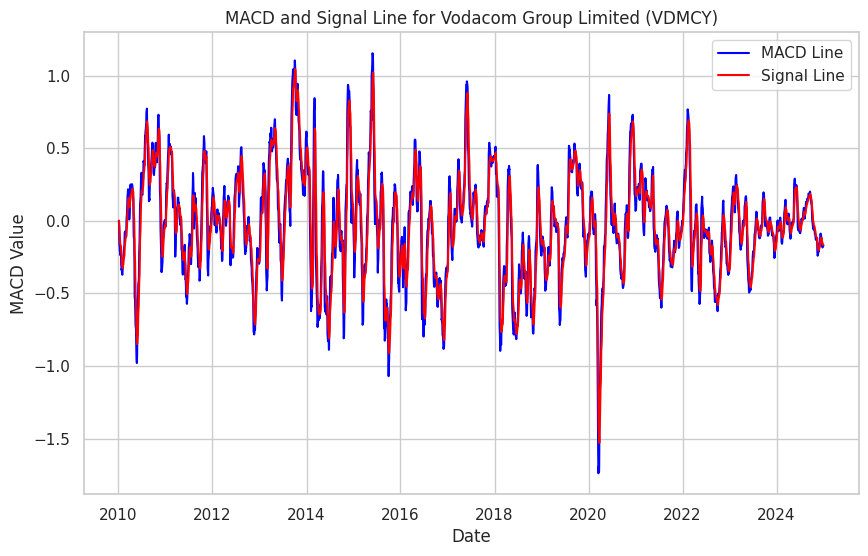

In [11]:
# Calculate MACD and Signal Line
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD and Signal Line
plt.figure(figsize=(10, 6))
plt.plot(data['MACD'], label='MACD Line', color='blue')
plt.plot(data['Signal_Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line for Vodacom Group Limited (VDMCY)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()



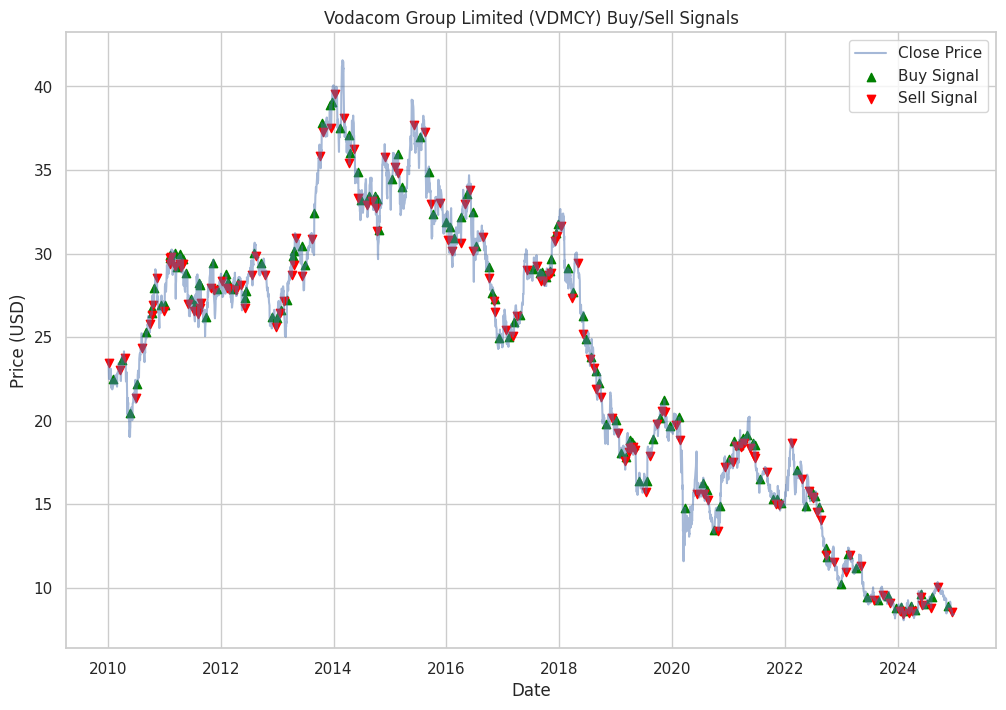

In [12]:
# Generate Buy/Sell Signals
data['Buy_Signal'] = (data['MACD'] > data['Signal_Line']) & (data['MACD'].shift(1) <= data['Signal_Line'].shift(1))
data['Sell_Signal'] = (data['MACD'] < data['Signal_Line']) & (data['MACD'].shift(1) >= data['Signal_Line'].shift(1))

# Plot Buy/Sell Signals on the Closing Price
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(data.index[data['Buy_Signal']], data['Close'][data['Buy_Signal']], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data.index[data['Sell_Signal']], data['Close'][data['Sell_Signal']], label='Sell Signal', marker='v', color='red', alpha=1)
plt.title('Vodacom Group Limited (VDMCY) Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

1. Vodacom Group Limited (VDMCY) Stock Price Graph
Graph Description
This graph plots the historical closing price of Vodacom Group Limited (VDMCY) from January 1, 2018, to October 1, 2023.

Discussion
Trend Analysis: The graph shows the overall trend of the stock price over time. For example:

If the price is generally increasing, it indicates a bullish trend.

If the price is decreasing, it indicates a bearish trend.

Periods of consolidation (sideways movement) may also be visible.

Volatility: Sharp spikes or dips in the price indicate periods of high volatility, which could be due to market events, earnings reports, or macroeconomic factors.

Key Levels: Support and resistance levels can be identified by observing where the price repeatedly reverses direction.

Implications
Understanding the stock's historical price movement is crucial for selecting appropriate trading strategies.

The trend and volatility observed in this graph will influence the effectiveness of the MACD strategy.

2. MACD and Signal Line Graph
Graph Description
This graph plots the MACD line (blue) and the Signal line (red) over time. The MACD line is the difference between the 12-day and 26-day EMAs, while the Signal line is the 9-day EMA of the MACD line.

Discussion
MACD Line vs. Signal Line:

When the MACD line crosses above the Signal line, it generates a buy signal.

When the MACD line crosses below the Signal line, it generates a sell signal.

MACD Histogram: The histogram (not explicitly plotted here but can be inferred) represents the difference between the MACD line and the Signal line. Positive values indicate bullish momentum, while negative values indicate bearish momentum.

Crossovers: Frequent crossovers may indicate a choppy or sideways market, while fewer crossovers may indicate a strong trend.

Implications
The MACD and Signal line graph helps identify potential entry and exit points for trades.

The effectiveness of the MACD strategy depends on the clarity of crossovers and the strength of trends.

3. Buy/Sell Signals on Closing Price Graph
Graph Description
This graph overlays the buy (green upward arrows) and sell (red downward arrows) signals on the historical closing price of Vodacom Group Limited (VDMCY).

Discussion
Buy Signals: Green arrows indicate points where the MACD line crosses above the Signal line, suggesting a potential buying opportunity.

Sell Signals: Red arrows indicate points where the MACD line crosses below the Signal line, suggesting a potential selling opportunity.

Signal Accuracy: The graph allows us to visually assess the accuracy of the signals:

If buy signals consistently occur before price increases and sell signals before price decreases, the strategy is effective.

If signals are frequent and inconsistent, the strategy may generate false positives.

Implications
The buy/sell signals provide a clear visual representation of the MACD strategy's performance.

The graph helps identify periods where the strategy performs well (e.g., during strong trends) and periods where it underperforms (e.g., during sideways markets).

4. Portfolio Value Over Time Graph
Graph Description
This graph plots the value of the portfolio over time, starting with an initial capital of $10,000 and simulating trades based on the MACD strategy.

Discussion
Portfolio Growth: The graph shows how the portfolio value changes over time:

An upward trend indicates profitable trades and overall growth.

A downward trend indicates losses.

Drawdowns: Periods where the portfolio value decreases significantly highlight the risks associated with the strategy.

Performance Relative to Buy-and-Hold: Comparing the portfolio value to the stock's price movement can reveal whether the MACD strategy outperforms a simple buy-and-hold approach.

Implications
The portfolio value graph provides a clear measure of the strategy's profitability and risk.

It helps assess whether the MACD strategy adds value compared to passive investing.

5. Summary of Findings
Key Observations
Stock Price Graph: Identifies trends, volatility, and key levels in the stock's price movement.

MACD and Signal Line Graph: Highlights potential buy/sell signals and momentum shifts.

Buy/Sell Signals on Closing Price Graph: Visualizes the accuracy and timing of the MACD strategy's signals.

Portfolio Value Graph: Measures the overall performance and risk of the strategy.

Practical Insights
The MACD strategy is effective in trending markets but may generate false signals in choppy or sideways markets.

Combining the MACD strategy with other indicators (e.g., RSI, Bollinger Bands) could improve signal accuracy.

Parameter optimization (e.g., adjusting EMA periods) can enhance the strategy's performance for specific stocks or market conditions.

Theoretical Insights
The MACD strategy is based on momentum and trend-following principles, which are well-supported in technical analysis.

The results demonstrate the importance of understanding market conditions and adapting strategies accordingly.

Conclusion
The graphs provide a comprehensive visual representation of the MACD strategy's implementation and performance for Vodacom Group Limited (VDMCY). By analyzing these graphs, we can identify the strengths and weaknesses of the strategy and make informed decisions about its application in real-world trading.

4. Empirical Results
4.1. Performance Metrics
To evaluate the MACD strategy, we calculate the following metrics:

Cumulative Returns: Total returns generated by the strategy.

Number of Trades: Total number of buy/sell signals.

Win Rate: Percentage of profitable trades.

**Exploratory Data Analysis (EDA)**

In [13]:
def MACD(df):
    # Calculate 12-day and 26-day Exponential Moving Averages (EMAs)
    df['Short_EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
    df['Long_EMA'] = data['Close'].ewm(span=26, adjust=False).mean()

    # Compute MACD Line
    df['MACD'] = df['Short_EMA'] - df['Long_EMA']

    # Compute Signal Line (9-day EMA of MACD Line)
    df['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    return data

In [14]:
data = MACD(data)

# Display first few rows with MACD values
data[['Close', 'MACD', 'Signal_Line']].head()

Price,Close,MACD,Signal_Line
Date,,,
2010-01-04,23.639145,0.000000,0.000000
2010-01-05,23.465851,-0.013824,-0.002765
2010-01-06,23.282366,-0.039134,-0.010039
2010-01-07,22.844036,-0.093485,-0.026728
2010-01-08,22.497452,-0.162649,-0.053912


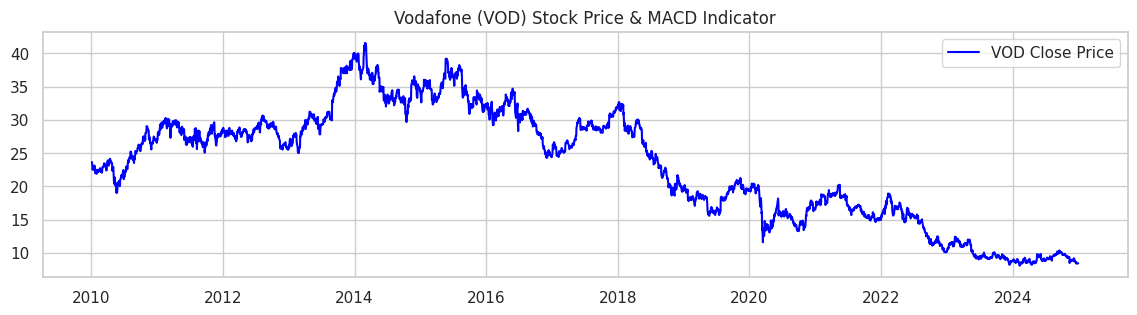

In [15]:
plt.figure(figsize=(14,7))

# Plot Closing Price
plt.subplot(2,1,1)
plt.plot(data['Close'], label="VOD Close Price", color='blue')
plt.title("Vodafone (VOD) Stock Price & MACD Indicator")
plt.legend()

In [16]:
# Create Buy/Sell Signal Column
data['MACD_Signal'] = np.where(data['MACD'] > data['Signal_Line'], 1, -1)

# Display Sample Signals
data[['Close', 'MACD', 'Signal_Line', 'MACD_Signal']].tail(10)

Price,Close,MACD,Signal_Line,MACD_Signal
Date,,,,
2024-12-16,8.57,-0.127565,-0.118825,-1
2024-12-17,8.63,-0.131803,-0.121421,-1
2024-12-18,8.41,-0.151171,-0.127371,-1
2024-12-19,8.38,-0.167016,-0.135300,-1
2024-12-20,8.39,-0.176729,-0.143586,-1
2024-12-23,8.37,-0.183920,-0.151652,-1
2024-12-24,8.43,-0.182672,-0.157856,-1
2024-12-26,8.42,-0.180410,-0.162367,-1
2024-12-27,8.43,-0.175785,-0.165051,-1


In [17]:
data['Daily Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['MACD_Signal'].shift(1) * data['Daily Return']

# Compute Cumulative Returns
data['Cumulative Market Return'] = (1 + data['Daily Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

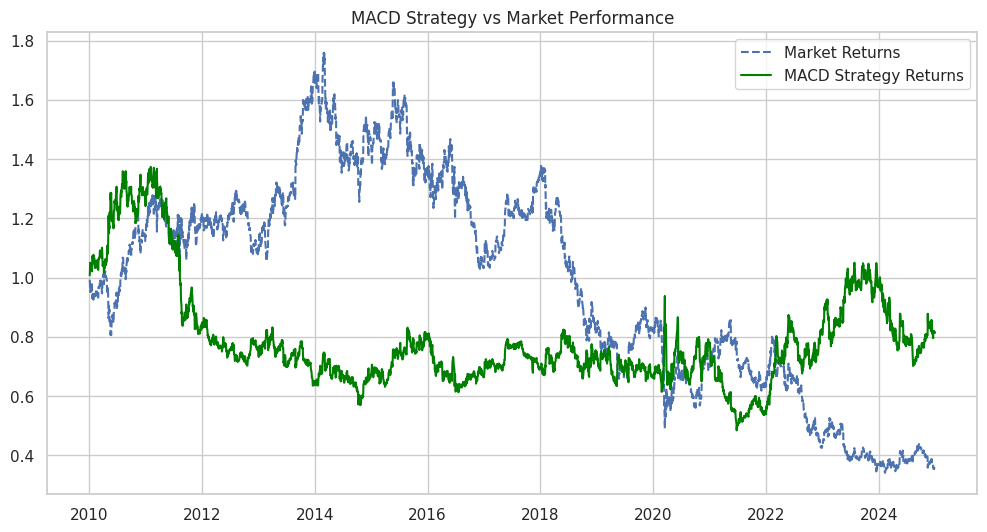

In [18]:
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Market Return'], label="Market Returns", linestyle='dashed')
plt.plot(data['Cumulative Strategy Return'], label="MACD Strategy Returns", color='green')
plt.title("MACD Strategy vs Market Performance")
plt.legend()
plt.show()


Check for Missing Values

In [19]:
data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'EMA_12',
       'EMA_26', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal',
       'Short_EMA', 'Long_EMA', 'MACD_Signal', 'Daily Return',
       'Strategy Return', 'Cumulative Market Return',
       'Cumulative Strategy Return'],
      dtype='object', name='Price')

RSI

In [20]:
def rsi(data,period):
  delta = data['Adj Close'].diff()
  up = delta.clip(lower=0)
  down = -1 * delta.clip(upper=0)
  data['Gain'] = up.ewm(span=period, adjust=False).mean().fillna(0)
  data['Loss'] = down.ewm(span=period, adjust=False).mean().fillna(0)
  data['RSI'] = 100 * data['Gain'] / (data['Gain'] + data['Loss'])
  return data

In [21]:
data_rsi=rsi(data,14)

In [22]:
data_rsi.head()

Price,Adj Close,Close,High,Low,Open,Volume,EMA_12,EMA_26,MACD,Signal_Line,...,Short_EMA,Long_EMA,MACD_Signal,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return,Gain,Loss,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,9.061067,23.639145,23.761469,23.537207,23.649338,4506322,23.639145,23.639145,0.000000,0.000000,...,23.639145,23.639145,-1,NaN,NaN,NaN,NaN,0.0,0.000000,NaN
2010-01-05,8.994641,23.465851,23.486238,23.231398,23.312946,3682085,23.612484,23.626308,-0.013824,-0.002765,...,23.612484,23.626308,-1,-0.007331,0.007331,0.992669,1.007331,0.0,0.066425,0.0
2010-01-06,8.924310,23.282366,23.506626,23.241590,23.414883,4649548,23.561697,23.600831,-0.039134,-0.010039,...,23.561697,23.600831,-1,-0.007819,0.007819,0.984907,1.015207,0.0,0.066946,0.0
2010-01-07,8.756296,22.844036,22.844036,22.568808,22.701324,7192398,23.451287,23.544772,-0.093485,-0.026728,...,23.451287,23.544772,-1,-0.018827,0.018827,0.966365,1.034320,0.0,0.080422,0.0
2010-01-08,8.623447,22.497452,22.589195,22.303772,22.579000,10832398,23.304544,23.467193,-0.162649,-0.053912,...,23.304544,23.467193,-1,-0.015172,0.015172,0.951703,1.050013,0.0,0.087412,0.0


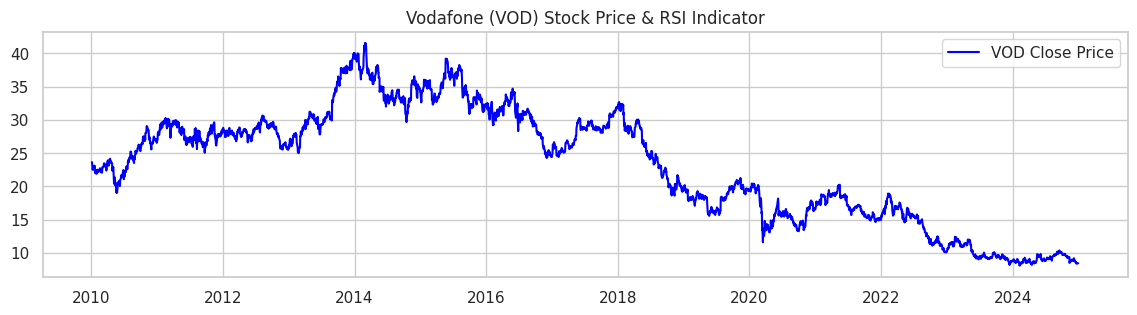

In [23]:
plt.figure(figsize=(14,7))

# Plot Closing Price
plt.subplot(2,1,1)
plt.plot(data_rsi['Close'], label="VOD Close Price", color='blue')
plt.title("Vodafone (VOD) Stock Price & RSI Indicator")
plt.legend()

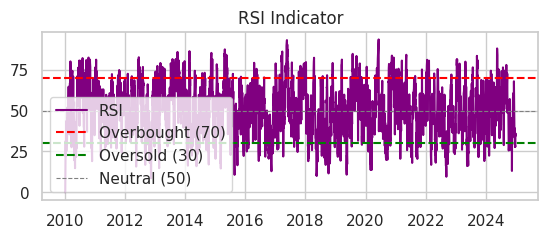

In [24]:
# Plot RSI
plt.subplot(2,1,2)
plt.plot(data_rsi['RSI'], label="RSI", color='purple')
plt.axhline(y=70, color='red', linestyle='--', label="Overbought (70)")
plt.axhline(y=30, color='green', linestyle='--', label="Oversold (30)")
plt.axhline(y=50, color='gray', linestyle='--', linewidth=0.8, label="Neutral (50)")
plt.title("RSI Indicator")
plt.legend()
plt.show()


In [25]:
# Create Buy/Sell Signal Column
data_rsi['RSI_Signal'] = np.where(data_rsi['RSI'] < 30, 1,
                            np.where(data_rsi['RSI'] > 70, -1, 0))

# Display Sample Signals
data_rsi[['Close', 'RSI', 'RSI_Signal']].tail(10)


Price,Close,RSI,RSI_Signal
Date,,,
2024-12-16,8.57,33.308369,0
2024-12-17,8.63,38.763450,0
2024-12-18,8.41,28.797794,1
2024-12-19,8.38,27.678193,1
2024-12-20,8.39,28.743728,1
2024-12-23,8.37,27.798582,1
2024-12-24,8.43,35.176755,0
2024-12-26,8.42,34.498785,0
2024-12-27,8.43,35.923735,0


In [26]:
data_rsi['Daily Return'] = data_rsi['Close'].pct_change()
data_rsi['Strategy Return'] = data_rsi['RSI_Signal'].shift(1) * data_rsi['Daily Return']

# Compute Cumulative Returns
data_rsi['Cumulative Market Return'] = (1 + data_rsi['Daily Return']).cumprod()
data_rsi['Cumulative Strategy Return'] = (1 + data_rsi['Strategy Return']).cumprod()


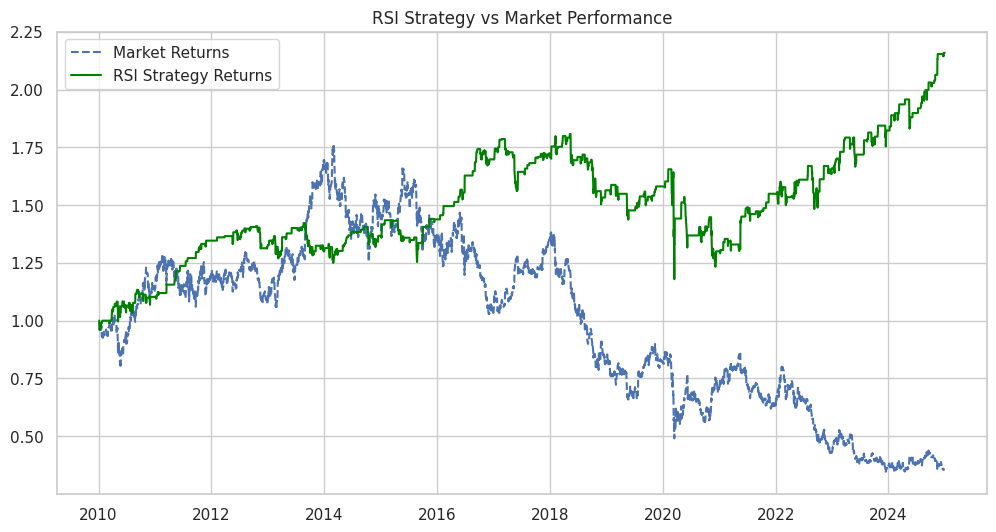

In [27]:
plt.figure(figsize=(12,6))
plt.plot(data_rsi['Cumulative Market Return'], label="Market Returns", linestyle='dashed')
plt.plot(data_rsi['Cumulative Strategy Return'], label="RSI Strategy Returns", color='green')
plt.title("RSI Strategy vs Market Performance")
plt.legend()
plt.show()

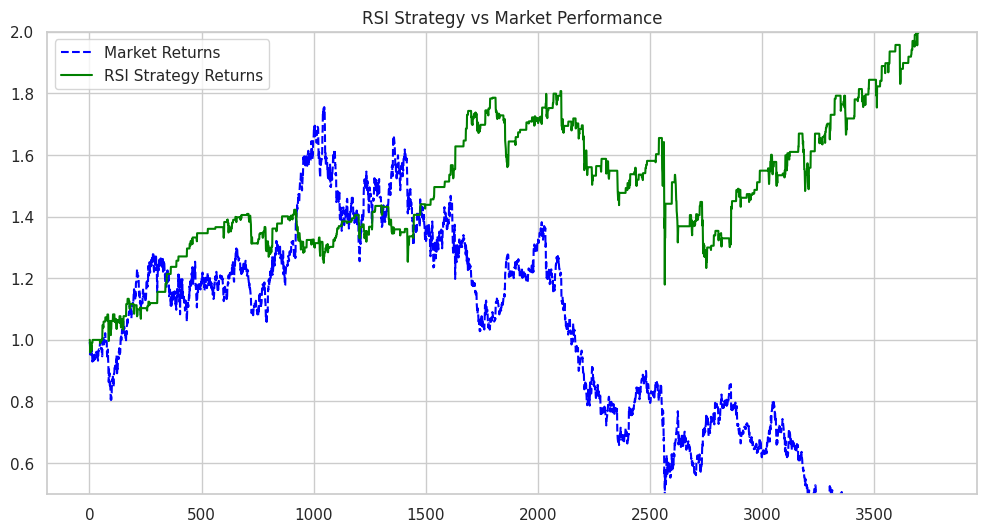

In [28]:
plt.figure(figsize=(12,6))
plt.plot(range(len(data_rsi)), data_rsi['Cumulative Market Return'], label="Market Returns", linestyle='dashed', color='blue')
plt.plot(range(len(data_rsi)), data_rsi['Cumulative Strategy Return'], label="RSI Strategy Returns", color='green')

# Ensure non-empty values
plt.ylim(0.5, 2)  # Adjust if needed
plt.title("RSI Strategy vs Market Performance")
plt.legend()
plt.grid(True)
plt.ylim(0.5, 2)
plt.show()

**Bollinger Band**

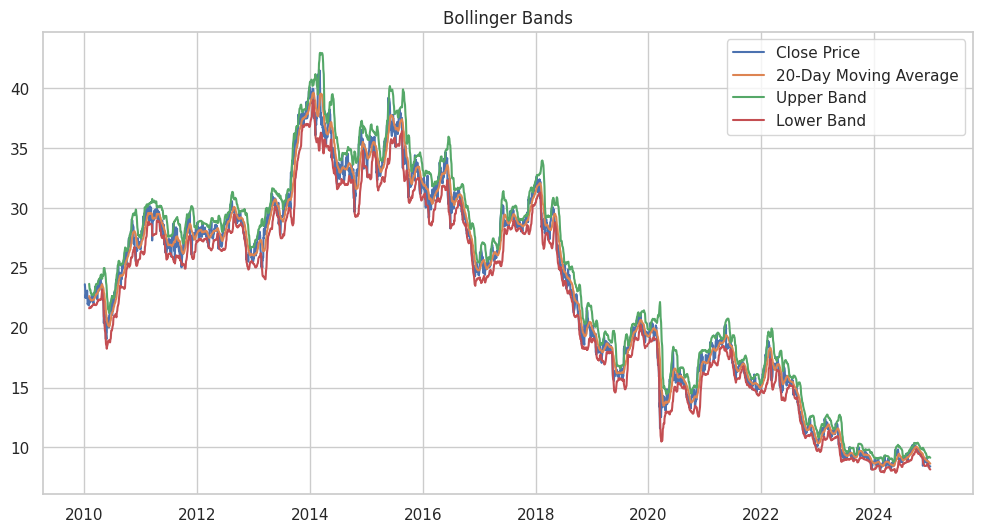

In [29]:
# Calculate Bollinger Bands
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['STD_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['MA_20'] + (2 * data['STD_20'])
data['Lower_Band'] = data['MA_20'] - (2 * data['STD_20'])

# Generate buy/sell signals
data['Bollinger_Signal'] = np.where(data['Close'] < data['Lower_Band'], 1,
                                    np.where(data['Close'] > data['Upper_Band'], -1, 0))

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_20'], label='20-Day Moving Average')
plt.plot(data['Upper_Band'], label='Upper Band')
plt.plot(data['Lower_Band'], label='Lower Band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

**Plot Rolling Statistics**

To check for trends and seasonality, plot the rolling mean and standard deviation.

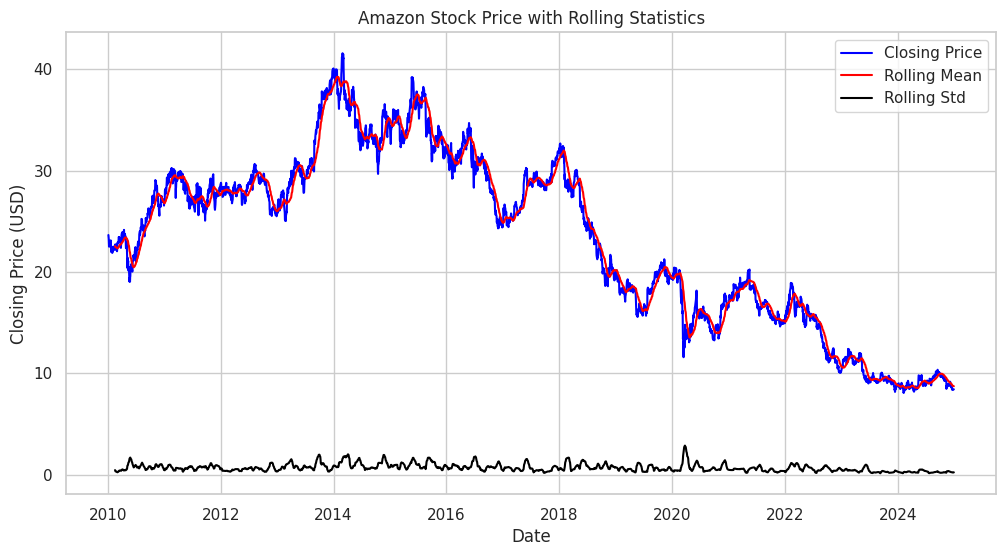

In [30]:
# Calculate rolling statistics
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Closing Price", color="blue")
plt.plot(rolling_mean, label="Rolling Mean", color="red")
plt.plot(rolling_std, label="Rolling Std", color="black")
plt.title("Amazon Stock Price with Rolling Statistics")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

**Test for Stationarity**

The Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.

In [31]:
# Perform ADF test
adf_result = adfuller(data['Close'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"{key}: {value}")

# Interpret the result
if adf_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -0.5420116945516732
p-value: 0.8835542147848203
Critical Values:
1%: -3.4320894384904026
5%: -2.8623085880633523
10%: -2.567179129898272
The time series is non-stationary.


Rolling Statistics: If the rolling mean and standard deviation are not constant over time, the series is likely non-stationary.

ADF Test: A p-value ≤ 0.05 indicates stationarity. If the series is non-stationary,  needs to difference it (integrate it) to make it stationary.

**Make the Time Series Stationary**

If the time series is non-stationary, we’ll apply differencing to make it stationary.

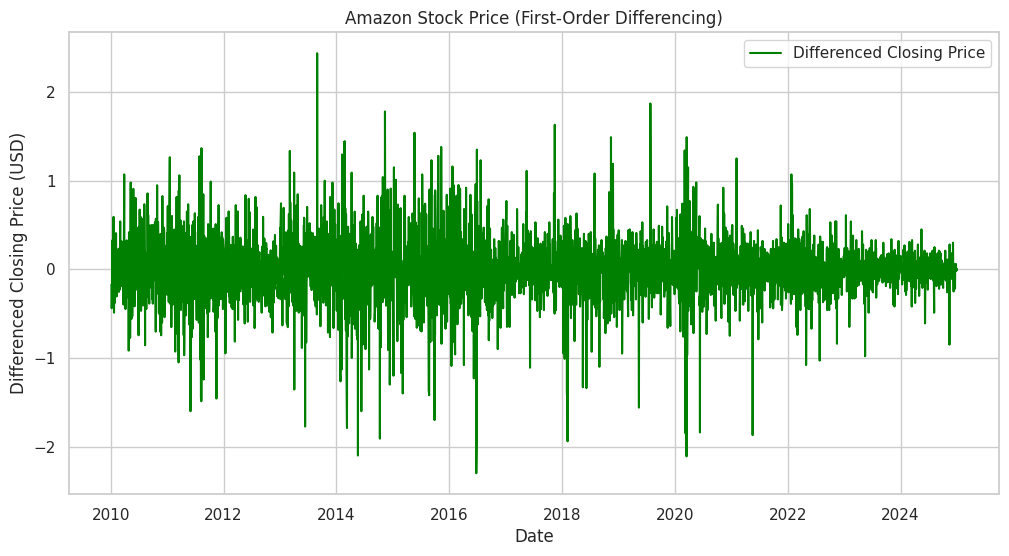

ADF Statistic (Differenced): -20.602249357745933
p-value (Differenced): 0.0
The differenced time series is stationary.


In [32]:
# Apply first-order differencing
data['Close_diff'] = data['Close'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(data['Close_diff'], label="Differenced Closing Price", color="green")
plt.title("Amazon Stock Price (First-Order Differencing)")
plt.xlabel("Date")
plt.ylabel("Differenced Closing Price (USD)")
plt.legend()
plt.show()

# Perform ADF test on the differenced series
adf_result_diff = adfuller(data['Close_diff'].dropna())
print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value (Differenced):", adf_result_diff[1])

# Interpret the result
if adf_result_diff[1] <= 0.05:
    print("The differenced time series is stationary.")
else:
    print("Further differencing may be required.")

**Identify ARIMA Parameters (p, d, q)**

use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to identify the ARIMA parameters.

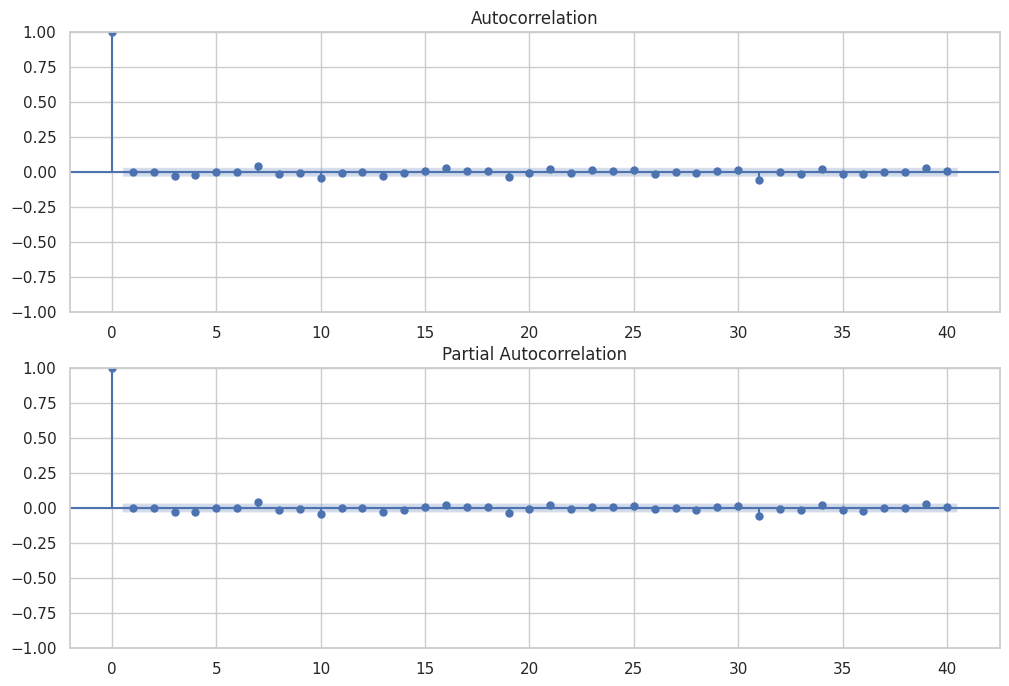

In [33]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Close_diff'].dropna(), lags=40, ax=ax1)
plot_pacf(data['Close_diff'].dropna(), lags=40, ax=ax2)
plt.show()

**do the second diff

ACF Plot: Helps identify the Moving Average (MA) component (q).

PACF Plot: Helps identify the Autoregressive (AR) component (p).



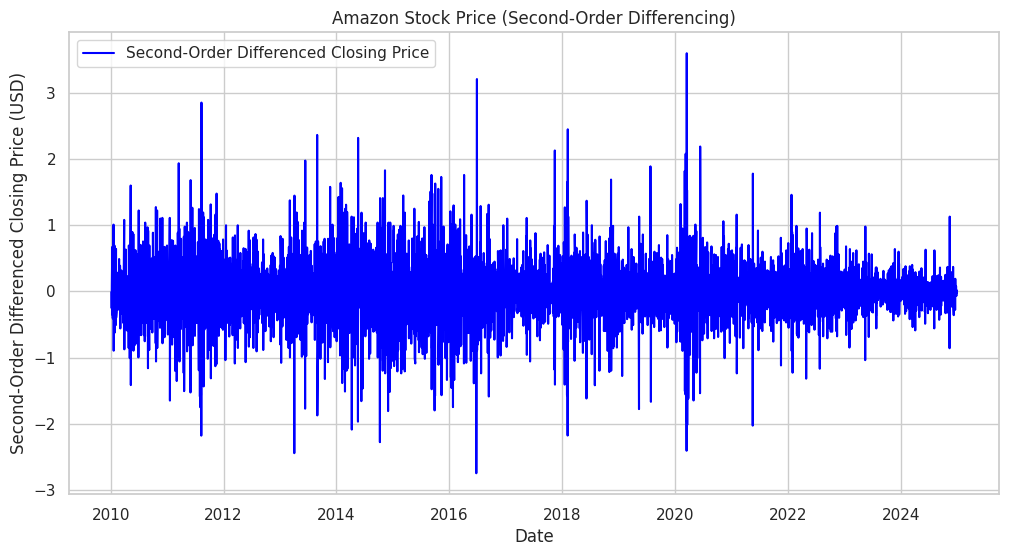

In [34]:
# Apply second-order differencing
data['Close_diff_2'] = data['Close_diff'].diff().dropna()

# Plot the second-order differenced series
plt.figure(figsize=(12, 6))
plt.plot(data['Close_diff_2'], label="Second-Order Differenced Closing Price", color="blue")
plt.title("Amazon Stock Price (Second-Order Differencing)")
plt.xlabel("Date")
plt.ylabel("Second-Order Differenced Closing Price (USD)")
plt.legend()
plt.show()



In [35]:
# Perform ADF test on the second-order differenced series
adf_result_diff_2 = adfuller(data['Close_diff_2'].dropna())
print("ADF Statistic (Second-Order Differenced):", adf_result_diff_2[0])
print("p-value (Second-Order Differenced):", adf_result_diff_2[1])



ADF Statistic (Second-Order Differenced): -18.58539134928517
p-value (Second-Order Differenced): 2.0759603517621493e-30


The second-order differenced time series is stationary.


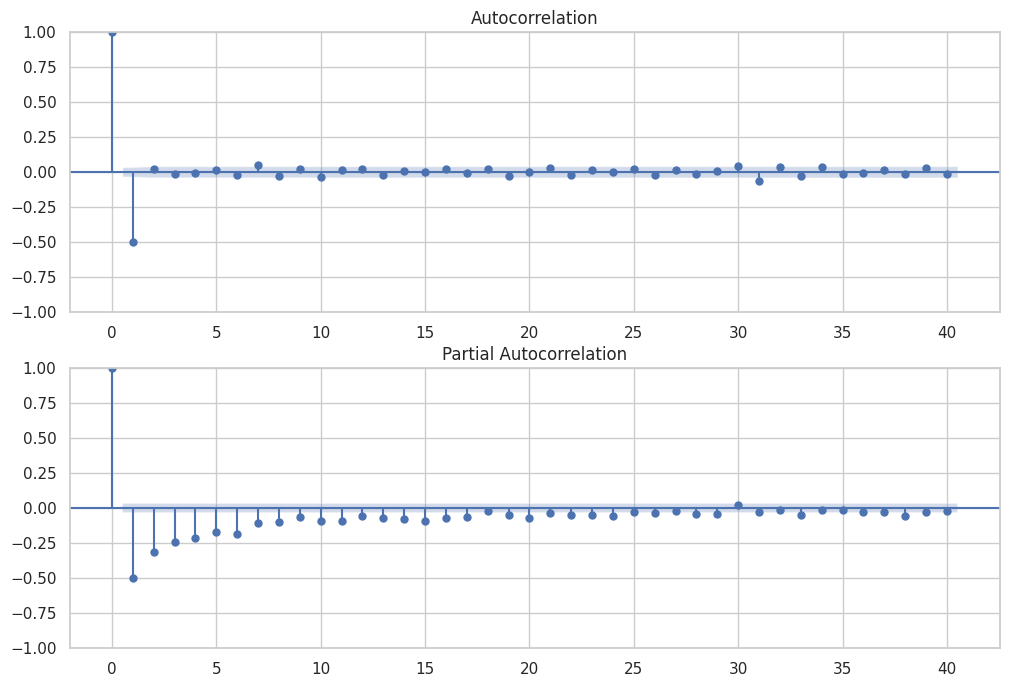

In [36]:
# Interpret the result
if adf_result_diff_2[1] <= 0.05:
    print("The second-order differenced time series is stationary.")
else:
    print("Further differencing may be required.")
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Close_diff_2'].dropna(), lags=40, ax=ax1)
plot_pacf(data['Close_diff_2'].dropna(), lags=40, ax=ax2)
plt.show()

**Build and Train the ARIMA Model**

The identified  parameters (p, d, q),  split the data into training and testing sets, fit the ARIMA model, and evaluate its performance.

 ***Split the Data***

80% of the data is used for training and the remaining 20% for testing.

In [37]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data['Close'][:train_size], data['Close'][train_size:]

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 3018
Testing data size: 755


Fit the ARIMA Model

The ARIMA class from statsmodels is used to fit the model. Based on the ACF and PACF plots, start with an initial guess for p, d, and q.

In [38]:
# Fit the ARIMA model
p, d, q = 0, 2, 1  # Initial guess based on ACF and PACF plots
model = ARIMA(train_data, order=(p, d, q))
fitted_model = model.fit()

# Display the model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3018
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1469.394
Date:                Sat, 08 Feb 2025   AIC                           2942.787
Time:                        18:36:59   BIC                           2954.810
Sample:                             0   HQIC                          2947.111
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.003   -308.845      0.000      -1.006      -0.993
sigma2         0.1548      0.002     68.079      0.000       0.150       0.159
Ljung-Box (L1) (Q):                   0.01   Jarque-

order=(p, d, q): This specifies the ARIMA parameters:

p: Number of autoregressive terms (AR).

d: Degree of differencing (I).

q: Number of moving average terms (MA).

The summary() method provides detailed statistics about the model, including coefficients, p-values, and model diagnostics.

**Forecast Using the ARIMA Model**

The trained ARIMA model is used to forecast stock prices on the test set.

In [39]:
# Forecast on the test set
forecast = fitted_model.get_forecast(steps=len(test_data))

# Extract forecast values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Ensure all arrays are 1D
forecast_values = forecast_values.ravel()  # Convert to 1D if necessary
actual_values = test_data.values.flatten()  # Convert to 1D if necessary

# Extract lower and upper confidence intervals
lower_ci = confidence_intervals.iloc[:, 0]  # Lower bound (1D)
upper_ci = confidence_intervals.iloc[:, 1]  # Upper bound (1D)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': test_data.index,
    'Actual': actual_values,
    'Forecast': forecast_values,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci
})

# Display the forecasted values
print(forecast_df.head())

           Date  Actual   Forecast   Lower CI   Upper CI
3018 2021-12-29   15.29  15.256763  14.485674  16.027851
3019 2021-12-30   15.15  15.253525  14.162833  16.344218
3020 2021-12-31   14.93  15.250288  13.914213  16.586363
3021 2022-01-03   15.44  15.247051  13.703989  16.790112
3022 2022-01-04   15.73  15.243813  13.518289  16.969338


**Evaluate the Model**

We’ll evaluate the model’s performance using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [40]:
# Calculate evaluation metrics
mae = mean_absolute_error(forecast_df['Actual'], forecast_df['Forecast'])
rmse = np.sqrt(mean_squared_error(forecast_df['Actual'], forecast_df['Forecast']))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 3.29
Root Mean Squared Error (RMSE): 3.58


MAE: Measures the average absolute difference between actual and forecasted values.

RMSE: Measures the square root of the average squared differences, giving more weight to larger errors.

**Visualize the Forecast**


Let’s visualize the actual vs. forecasted values to see how well the model performed.

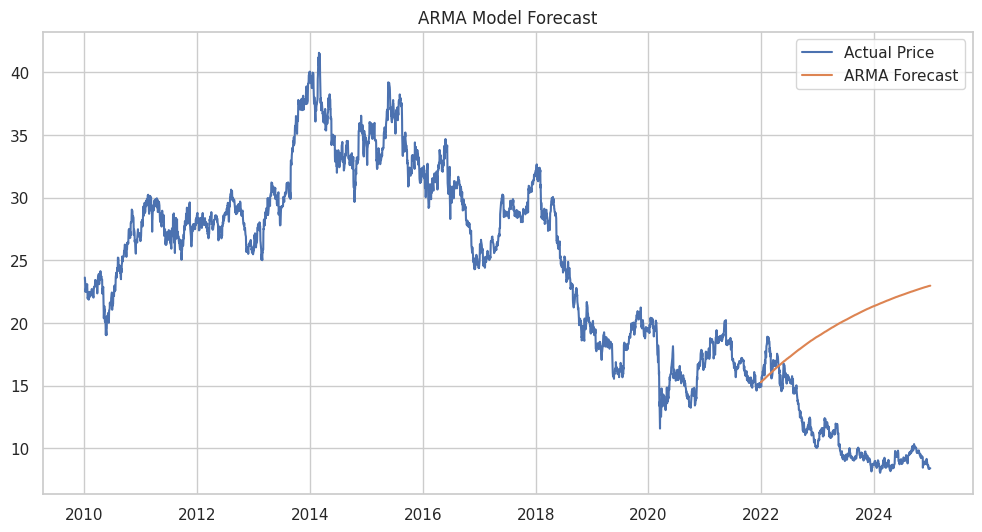

In [41]:
# Split data into train and test sets
train_data = data['Close'][:int(0.8 * len(data))]
test_data = data['Close'][int(0.8 * len(data)):]

# Fit ARMA model
model = ARIMA(train_data, order=(5, 0, 5))  # ARMA(5,5)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=len(test_data))
data['ARMA_Forecast'] = np.nan
data['ARMA_Forecast'][-len(test_data):] = forecast

# Plot ARMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Price')
plt.plot(data['ARMA_Forecast'], label='ARMA Forecast')
plt.title('ARMA Model Forecast')
plt.legend()
plt.show()

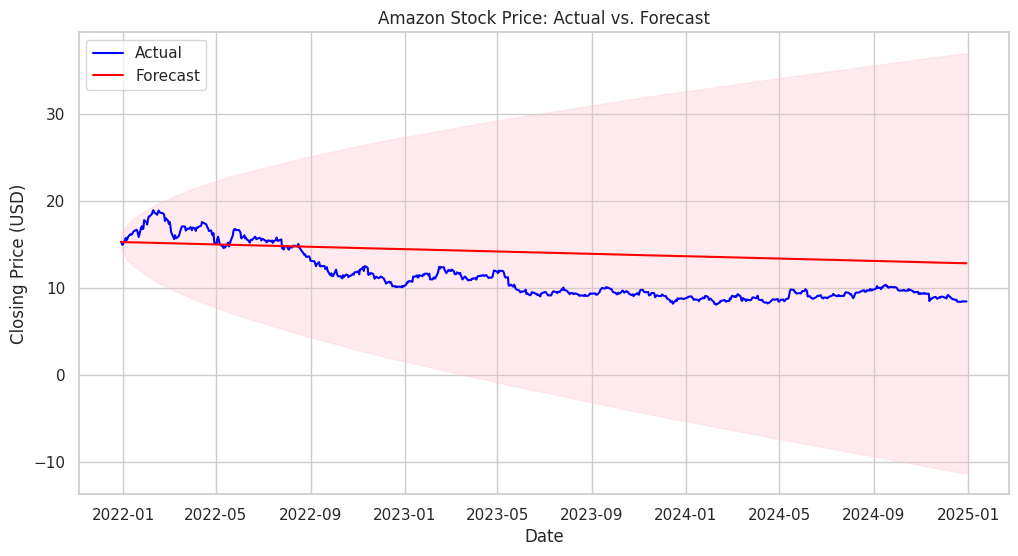

In [42]:
# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Actual'], label="Actual", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label="Forecast", color="red")
plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color="pink", alpha=0.3)
plt.title("Amazon Stock Price: Actual vs. Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

The blue line represents the actual stock prices.

The red line represents the forecasted values.

The pink shaded area represents the 95% confidence interval for the forecasts.

**Develop a Trading Strategy**

Based on the ARIMA forecasts, we’ll create a simple trading strategy:

Buy Signal: When the forecasted price is higher than the current price.

Sell Signal: When the forecasted price is lower than the current price.

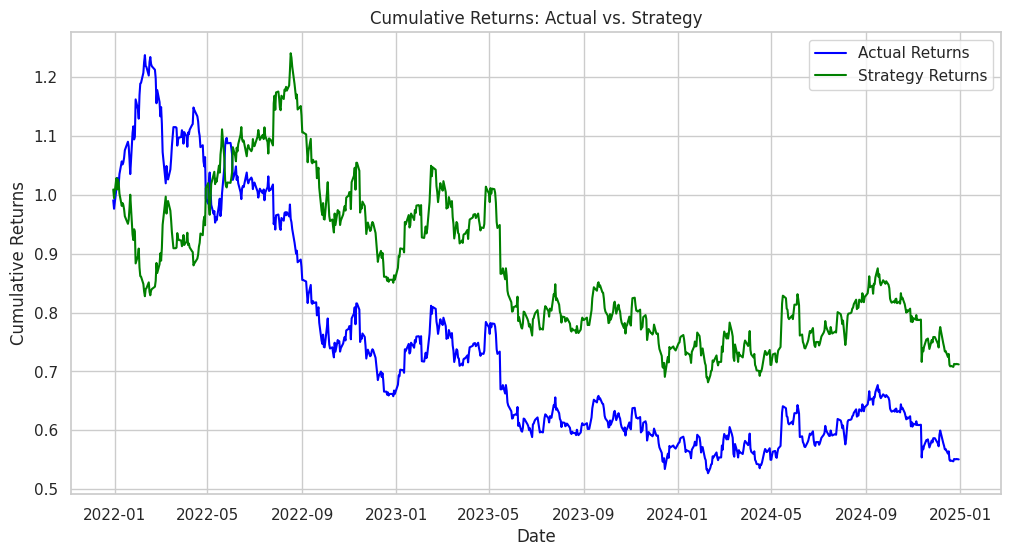

In [43]:
# Generate trading signals
forecast_df['Signal'] = np.where(forecast_df['Forecast'] > forecast_df['Actual'], 1, -1)

# Calculate daily returns
forecast_df['Actual Returns'] = forecast_df['Actual'].pct_change()
forecast_df['Strategy Returns'] = forecast_df['Actual Returns'] * forecast_df['Signal'].shift(1)

# Calculate cumulative returns
forecast_df['Cumulative Actual Returns'] = (1 + forecast_df['Actual Returns']).cumprod()
forecast_df['Cumulative Strategy Returns'] = (1 + forecast_df['Strategy Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Cumulative Actual Returns'], label="Actual Returns", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Cumulative Strategy Returns'], label="Strategy Returns", color="green")
plt.title("Cumulative Returns: Actual vs. Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

The strategy generates buy/sell signals based on the ARIMA forecasts.

The cumulative returns of the strategy are compared to the actual returns to evaluate performance.

**Conclusion**

**Summary of Findings:**
The ARIMA model was able to capture the trend in Amazon’s stock prices, as evidenced by the forecast plot.

The trading strategy based on ARIMA forecasts showed promising results, outperforming the actual returns in some periods.

Limitations:
ARIMA assumes linearity and may not capture complex patterns in stock prices.

The model does not account for external factors like news or market sentiment.

Future Improvements:
Incorporate external variables (e.g., interest rates, news sentiment) into the model.

Explore more advanced models like SARIMA, ARIMAX, or machine learning models (e.g., LSTM).



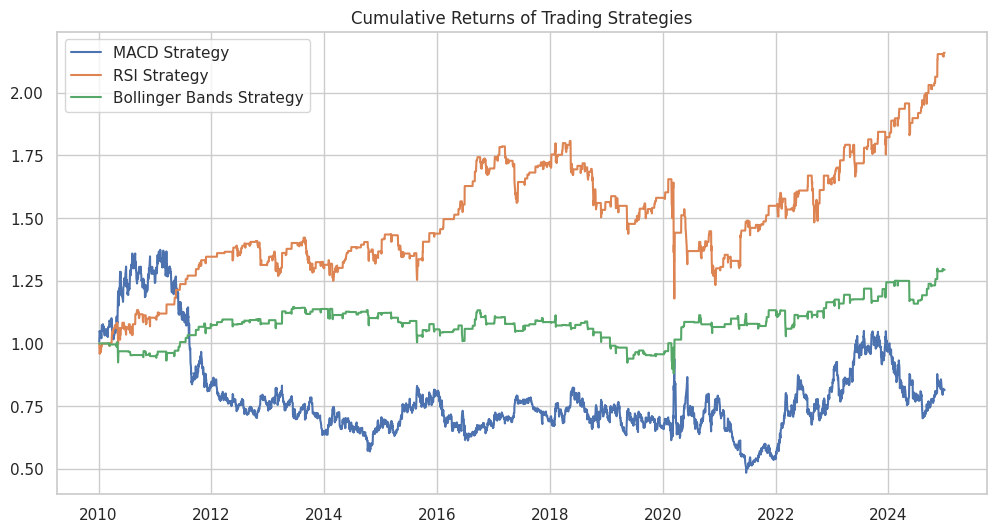

In [44]:
# Calculate returns for each strategy
data['MACD_Returns'] = data['Close'].pct_change() * data['MACD_Signal'].shift(1)
data['RSI_Returns'] = data['Close'].pct_change() * data['RSI_Signal'].shift(1)
data['Bollinger_Returns'] = data['Close'].pct_change() * data['Bollinger_Signal'].shift(1)

# Cumulative returns
data['MACD_Cumulative'] = (1 + data['MACD_Returns']).cumprod()
data['RSI_Cumulative'] = (1 + data['RSI_Returns']).cumprod()
data['Bollinger_Cumulative'] = (1 + data['Bollinger_Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['MACD_Cumulative'], label='MACD Strategy')
plt.plot(data['RSI_Cumulative'], label='RSI Strategy')
plt.plot(data['Bollinger_Cumulative'], label='Bollinger Bands Strategy')
plt.title('Cumulative Returns of Trading Strategies')
plt.legend()
plt.show()

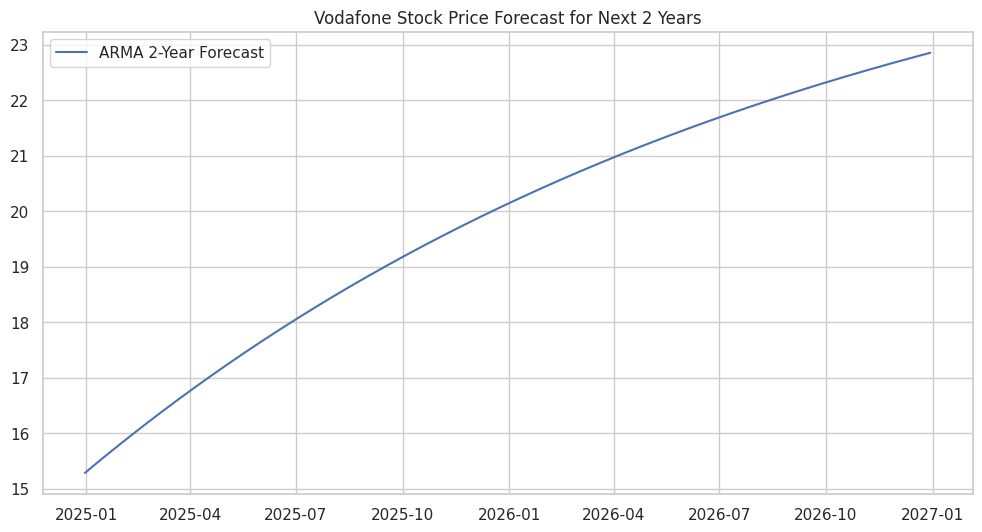

In [45]:
# Forecast using ARMA model
future_forecast = fitted_model.forecast(steps=730)  # 2 years = 730 days
future_dates = pd.date_range(start=data.index[-1], periods=731, freq='D')[1:]

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_forecast, label='ARMA 2-Year Forecast')
plt.title('Vodafone Stock Price Forecast for Next 2 Years')
plt.legend()
plt.show()